# Principal Component Analysis (PCA)

Examples adapted from https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # use seaborn for matplotlib plots

### Generate some random correlated two dimensional data.

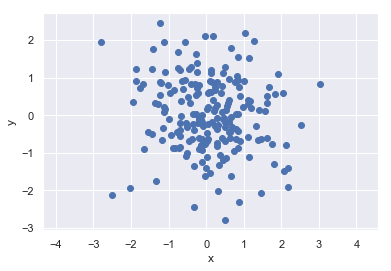

In [43]:
# Generate a random cloud of (x, y) points.
np.random.seed(1)
xy = np.random.randn(200, 2)  # 200 (x, y) points
plt.scatter(xy[:, 0], xy[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal');

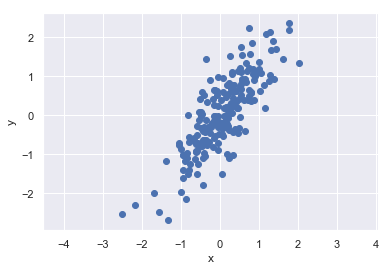

In [44]:
# Apply a random transformation (rotation, scaling) to the points.
transformation = np.random.rand(2, 2)  # 2x2 random transformation matrix
xy = xy @ transformation  # apply the transformation to the points

plt.scatter(xy[:, 0], xy[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal');

### PCA analysis of the two dimensional data.

In [45]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(xy)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [46]:
# the orthogonal vectors that best explain the variance in the data
print(pca.components_)

[[-0.56295862 -0.82648508]
 [-0.82648508  0.56295862]]


In [47]:
# how much variance each of the above vectors accounts for
print(pca.explained_variance_)

[1.32170439 0.11909325]


In [48]:
# this function will draw an arrow from point v0 to point v1
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    color='black',
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

1.3217043946525873 [-0.56295862 -0.82648508]
0.11909325141258627 [-0.82648508  0.56295862]


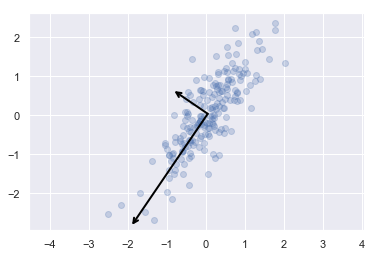

In [49]:
# replot the data points overlaid with arrows showing the principal components
plt.scatter(xy[:, 0], xy[:, 1], alpha=0.25)

for length, vector in zip(pca.explained_variance_, pca.components_):
    print(length, vector)
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)

plt.axis('equal');

### Transform the data so that we look at it from the perspective of the principal components.

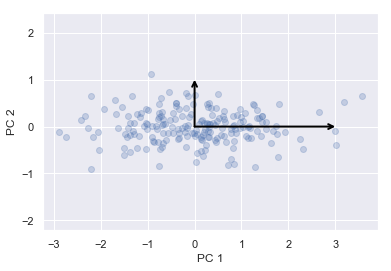

In [50]:
xy_pca = pca.transform(xy)

plt.scatter(xy_pca[:, 0], xy_pca[:, 1], alpha=0.25)
draw_vector((0, 0), (3, 0))
draw_vector((0, 0), (0, 1))
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.axis('equal');

### Dimensionality reduction

* Most of the variance in the data is along the 1st principal component.
* We can opt to ignore the variance along the 2nd principal component.
* This amounts to projecting the data onto the 1st principal component.
* We lose some information, but it is the smallest component of variation in the data.
* In return, we have compressed the data from two to one dimensional.

original shape:    (200, 2)
transformed shape: (200, 1)


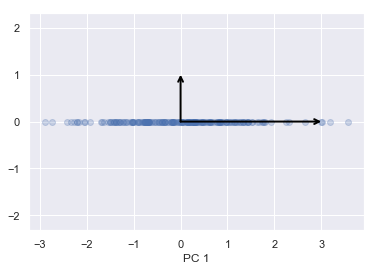

In [51]:
# redo PCA, but specify only a single component
pca = PCA(n_components=1)
pca.fit(xy)

# transform to PCA coordinates
xy_pca = pca.transform(xy)

# see that we have compressed the data from two to one dimensional
print("original shape:   ", xy.shape)
print("transformed shape:", xy_pca.shape)

# plot compressed data in PCA coordinates
plt.scatter(xy_pca[:], np.zeros(xy_pca.shape), alpha=0.25)
draw_vector((0, 0), (3, 0))
draw_vector((0, 0), (0, 1))
plt.xlabel('PC 1')
plt.axis('equal');

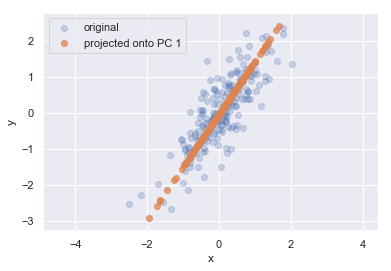

In [53]:
# go back from PCA coordinates to our data's original coordinates
xy_new = pca.inverse_transform(xy_pca)

# plot original data overlaid with PCA compressed data
plt.scatter(xy[:, 0], xy[:, 1], alpha=0.25, label='original')
plt.scatter(xy_new[:, 0], xy_new[:, 1], alpha=0.75, label='projected onto PC 1')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.axis('equal');

### How many components should you choose?

* Often 2 or 3 are chosen simply to make it easier to visualize the data.
* Otherwise, you can look to see at what point adding more components does not do much better at explaining the variation in the data.

[1.32170439 0.11909325]
[0.91734214 0.08265786]


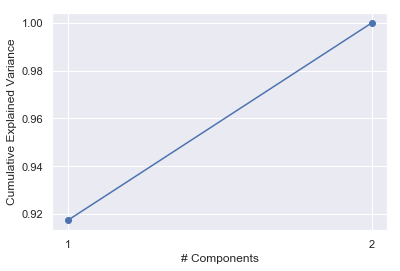

In [45]:
pca = PCA(n_components=2)
pca.fit(xy)

print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

plt.plot(np.arange(1, 3), np.cumsum(pca.explained_variance_ratio_), 'o-')
plt.xticks([1, 2])
plt.xlabel('# Components')
plt.ylabel('Cumulative Explained Variance');

In [2]:
from sklearn import datasets
import pandas as pd

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target
y -= y.mean()
features = "age sex bmi map tc ldl hdl tch ltg glu".split()
diabetesdf = pd.DataFrame(diabetes.data, columns=features)
diabetesdf.tail()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064


[0.40242142 0.14923182 0.12059623 0.09554764 0.06621856 0.06027192
 0.05365605 0.04336832 0.00783199 0.00085605]


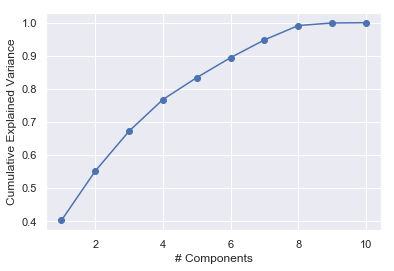

In [96]:
pca = PCA(n_components=10)
pca.fit(X)

print(pca.explained_variance_ratio_)

plt.plot(np.arange(1, 11), np.cumsum(pca.explained_variance_ratio_), 'o-')
plt.xlabel('# Components')
plt.ylabel('Cumulative Explained Variance');

(442, 10)
(442, 8)


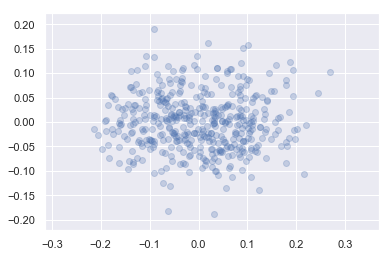

In [97]:
pca = PCA(n_components=8)
pca.fit(X)

X_pca = pca.transform(X)

print(X.shape)
print(X_pca.shape)

plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.25)
plt.axis('equal');

In [98]:
from sklearn.linear_model import LinearRegression

model_all = LinearRegression()
model_all.fit(X, y)
yfit_all = model_all.predict(X)

model_pca = LinearRegression()
model_pca.fit(X_pca, y)
yfit_pca = model_pca.predict(X_pca)

print("MSE all:", np.mean((y - yfit_all)**2))
print("MSE PCA:", np.mean((y - yfit_pca)**2))
print()
print("R^2 all:", model_all.score(X, y))
print("R^2 PCA:", model_pca.score(X_pca, y))

MSE all: 2859.6903987680657
MSE PCA: 2882.8112128749726

R^2 all: 0.5177494254132934
R^2 PCA: 0.5138503928841875


# Example with higher dimensional data (e.g. images).

### Each 8x8 grayscale image is a point in a 64-dimensional space representing the instensity of each of the 64 pixels in the image.

(1797, 64)
(1797,)


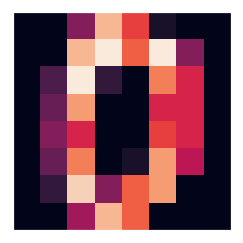

In [110]:
from sklearn.datasets import load_digits
digits = load_digits()

print(digits.data.shape)
print(digits.target.shape)

plt.imshow(digits.data[0, :].reshape(8, 8))
plt.xticks([])
plt.yticks([]);

In [105]:
def plot_digits(images, rows=5, cols=10):
    fig, ax = plt.subplots(rows, cols, figsize=(2*cols, 2*rows))
    k = 0
    for i in range(rows):
        for j in range(cols):
            ax[i, j].imshow(images[k, :].reshape(8, 8))
            ax[i, j].set_xticks([])
            ax[i, j].set_yticks([])
            k += 1

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[0 9 5 5 6 5 0 9 8 9]
[8 4 1 7 7 3 5 1 0 0]


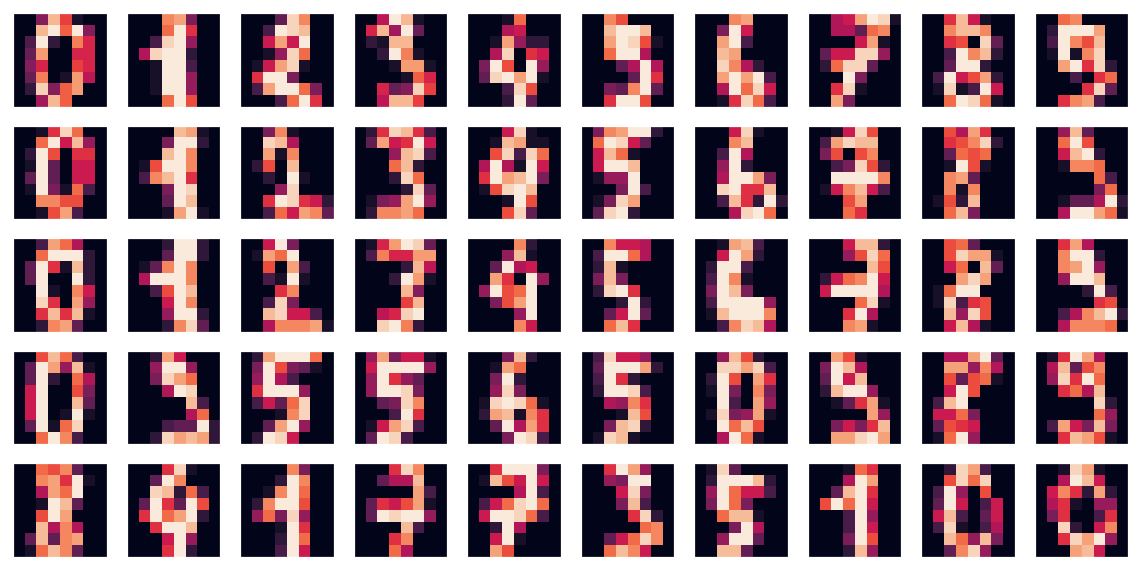

In [106]:
plot_digits(digits.data)

for i in range(5):
    print(digits.target[i * 10:i * 10 + 10])

### Project 64-dimensional images onto a 2-dimensional space for visualization.

These two dimensions are mixtures of the original 64 dimensions (i.e. mixtures of the original pixel intensities).

In [111]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)

print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


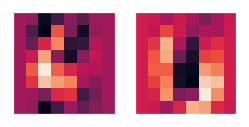

In [114]:
fig, ax = plt.subplots(1, 2, figsize=(4, 8))
ax[0].imshow(pca.components_[0].reshape(8, 8))
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].imshow(pca.components_[1].reshape(8, 8))
ax[1].set_xticks([])
ax[1].set_yticks([]);

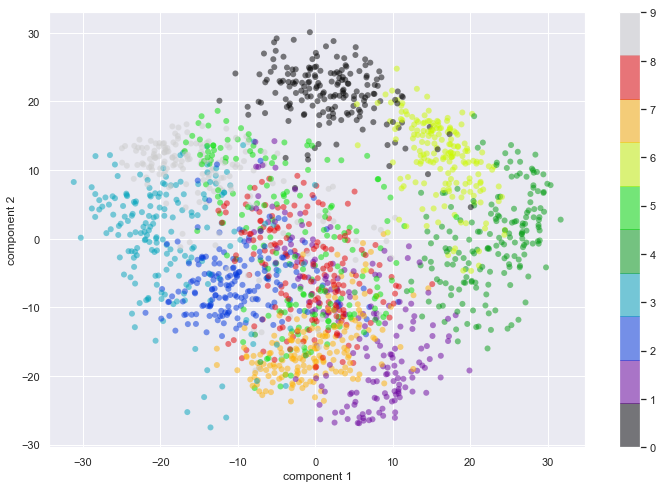

In [94]:
plt.figure(figsize=(12, 8))
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

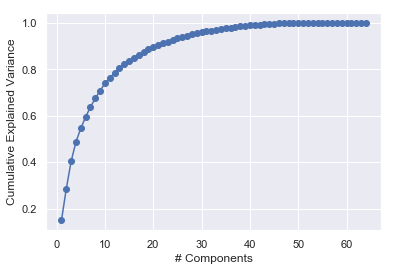

In [102]:
pca = PCA()
pca.fit_transform(digits.data)

plt.plot(np.arange(1, 65), np.cumsum(pca.explained_variance_ratio_), 'o-')
plt.xlabel('# Components')
plt.ylabel('Cumulative Explained Variance');

### PCA as a filter for noisy data

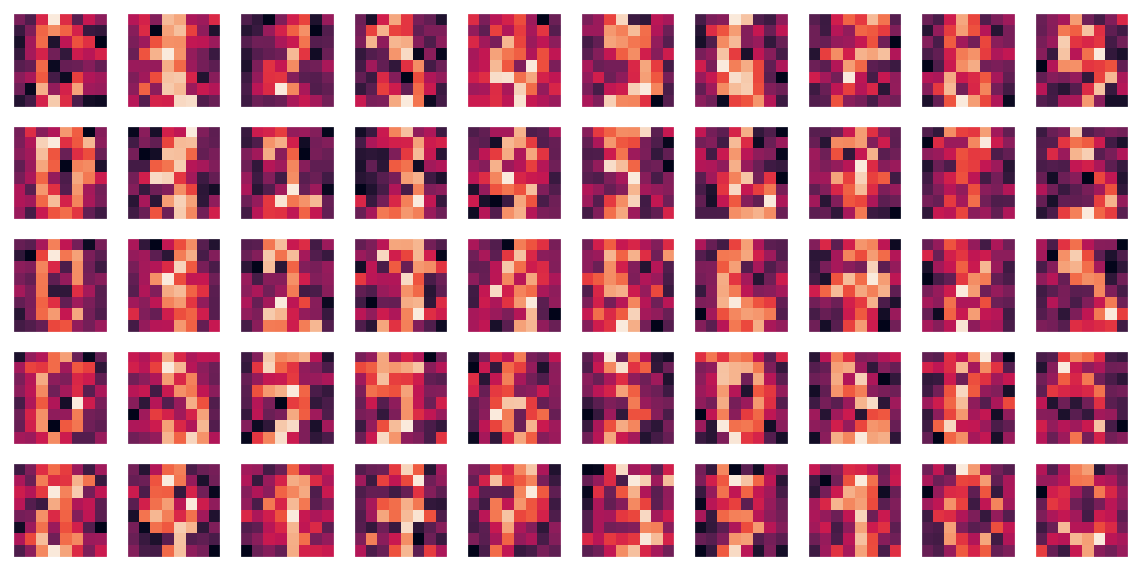

In [107]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)

plot_digits(noisy)

In [104]:
# PCA that preserves 50% of the variance in the data
pca = PCA(0.50).fit(noisy)

print(pca.n_components_)

12


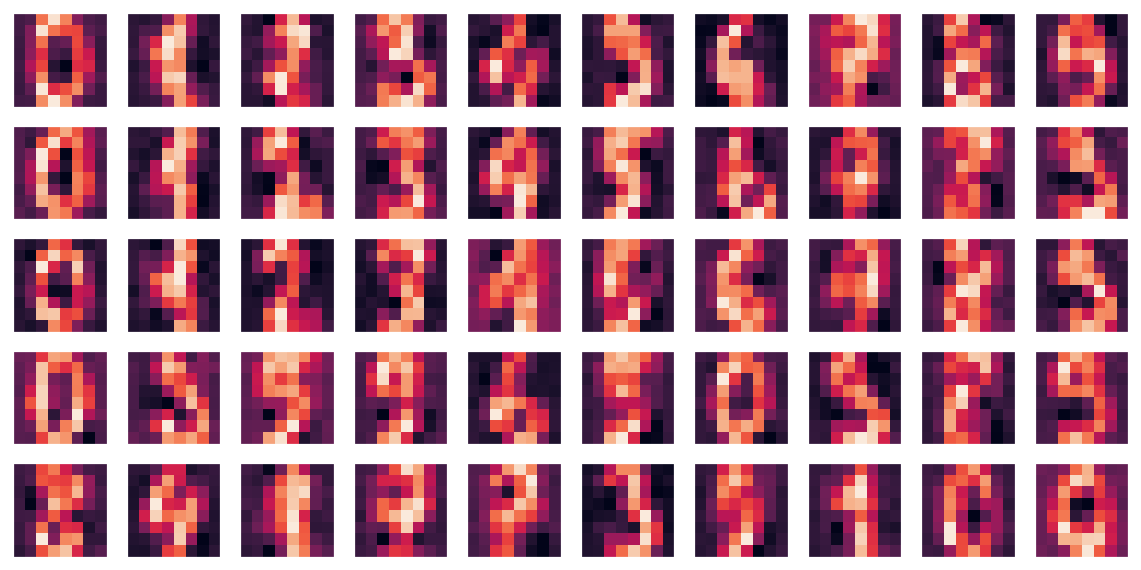

In [108]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)

plot_digits(filtered)

### Eigenfaces

In [109]:
# WARNING !!! This is ~200 MB of data which may take a few minutes to download!
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)

print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [116]:
# number of pixels in each image = number of dimensions in the image space of this image set
62 * 47

2914

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


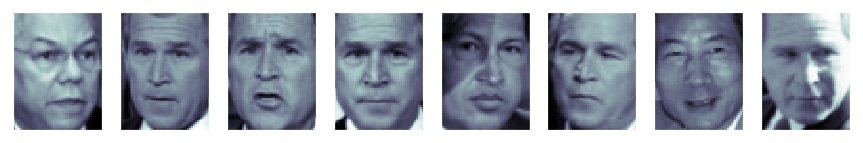

In [128]:
fig, ax = plt.subplots(1, 8, figsize=(15, 5))
for i in range(8):
    ax[i].imshow(faces.images[i, :, :].reshape(62, 47), cmap='bone')
    ax[i].set_xticks([])
    ax[i].set_yticks([])

print(faces.target_names[:8])

In [118]:
# PCA for first 150 principal components
# Randomized solver performs some approximates to speed up the computation for high dimensional data sets
pca = PCA(n_components=150, svd_solver='randomized')
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=False)

In [126]:
print(pca.components_.shape)

(150, 2914)


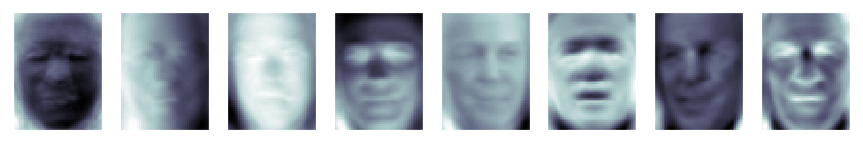

In [129]:
fig, ax = plt.subplots(1, 8, figsize=(15, 5))
for i in range(8):
    ax[i].imshow(pca.components_[i, :].reshape(62, 47), cmap='bone')
    ax[i].set_xticks([])
    ax[i].set_yticks([])

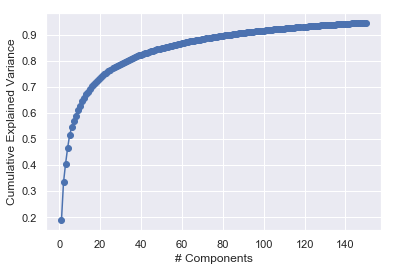

In [130]:
plt.plot(np.arange(1, 151), np.cumsum(pca.explained_variance_ratio_), 'o-')
plt.xlabel('# Components')
plt.ylabel('Cumulative Explained Variance');

In [131]:
faces_pca = pca.transform(faces.data)
faces_projected = pca.inverse_transform(faces_pca)

print(faces_pca.shape)

(1348, 150)


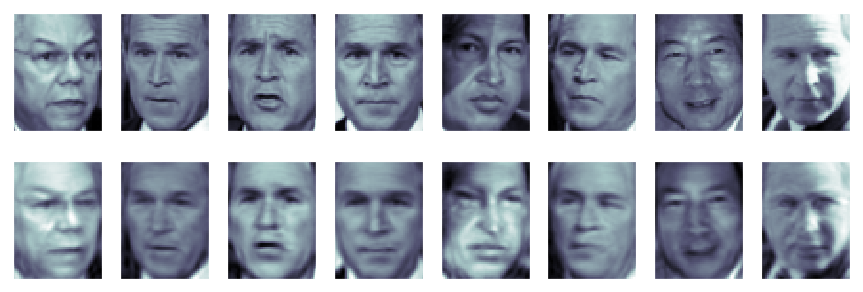

In [134]:
fig, ax = plt.subplots(2, 8, figsize=(15, 5))
for i in range(8):
    # original face
    ax[0, i].imshow(faces.images[i, :, :].reshape(62, 47), cmap='bone')
    ax[0, i].set_xticks([])
    ax[0, i].set_yticks([])
    
    # projected face
    ax[1, i].imshow(faces_projected[i, :].reshape(62, 47), cmap='bone')
    ax[1, i].set_xticks([])
    ax[1, i].set_yticks([])

### EEG recordings

In [15]:
import pandas as pd

df = pd.read_csv('EEG_data.csv')

df.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


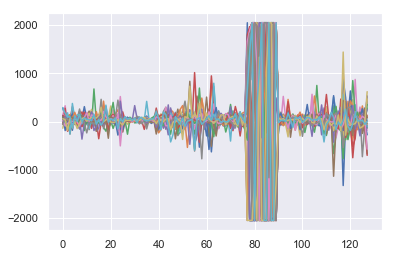

In [16]:
eeg = np.array(df['Raw'])

eeg = eeg[:128*100].reshape(128, 100).T

for i in range(30):
    plt.plot(eeg[i, :])

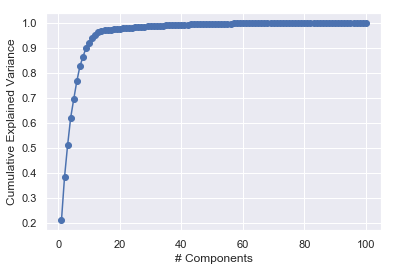

In [17]:
pca = PCA()
pca.fit_transform(eeg)

plt.plot(np.arange(1, 101), np.cumsum(pca.explained_variance_ratio_), 'o-')
plt.xlabel('# Components')
plt.ylabel('Cumulative Explained Variance');

In [28]:
pca = PCA(0.95)
pca.fit_transform(eeg)

print(pca.n_components_)

12


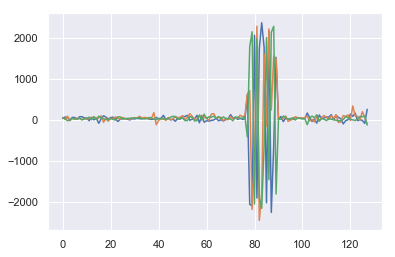

In [29]:
mixtures = pca.transform(eeg)
projected = pca.inverse_transform(mixtures)

for i in range(3):
    plt.plot(projected[i, :])

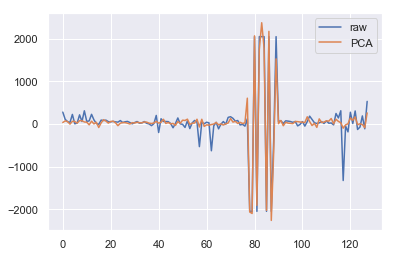

In [30]:
col = 0
plt.plot(eeg[col, :], label='raw')
plt.plot(projected[col, :], label='PCA')
plt.legend();

(100, 2)
(2, 128)


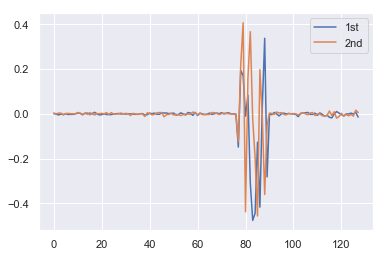

In [31]:
pca = PCA(2)
mixtures = pca.fit_transform(eeg)

print(mixtures.shape)
print(pca.components_.shape)

plt.plot(pca.components_[0, :], label='1st')
plt.plot(pca.components_[1, :], label='2nd')
plt.legend();

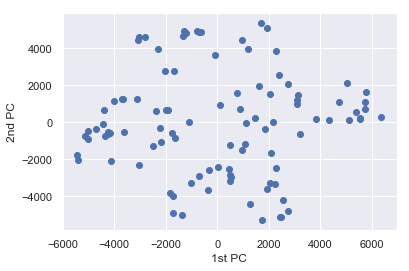

In [33]:
plt.scatter(mixtures[:, 0], mixtures[:, 1])
plt.xlabel('1st PC')
plt.ylabel('2nd PC');